In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [21]:
wine=pd.read_csv('wine.csv')

In [22]:
# Check for duplicates
duplicate_rows = wine[wine.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 1177


In [23]:
# Remove duplicates and reset the index
wine.drop_duplicates(inplace=True, keep='first')
wine.reset_index(drop=True, inplace=True)

In [24]:
# Check for null values in the entire DataFrame
wine.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

<div class="alert alert-block alert-success"> In the next step, the categorical column color is one-hot encoded using pd.get_dummies resulting in a binary column titled color_white. The color_white and quality columns, which do not require scaling are extracted for preservation. After removing these columns, the numerical columns are standardized using StandardScaler. The dataframe wine_scaled_df integrates the scaled numerical features and the color_white and quality columns.

In [25]:
# Perform one-hot encoding
wine_encoded = pd.get_dummies(wine, columns=['color'], drop_first=True)

# Save color_white and quality columns
color_col = wine_encoded['color_white']
quality_col = wine_encoded['quality']

# Drop the color_white and quality columns before scaling
wine_encoded = wine_encoded.drop(['color_white', 'quality'], axis=1)

# Scale the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_encoded)

# Create the scaled DataFrame and attach the color_white and quality columns
wine_scaled_df = pd.DataFrame(wine_scaled, columns=wine_encoded.columns)
wine_scaled_df['color_white'] = color_col
wine_scaled_df['quality'] = quality_col

<div class="alert alert-block alert-success">In the next step, we perform dimensionality reduction on wine_scaled_df. First, we use Principal Component Analysis (PCA) to reduce the dataset's dimensions to two principal components. Then, we use t-SNE to map the dataset to a two-dimensional space. In both cases, we exclude the color_white and quality columns because dimensionality reduction techniques like PCA and t-SNE are typically applied to continuous features, and categorical or target variables are excluded.

In [26]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine_scaled_df.drop(['color_white','quality'], axis=1))

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(wine_scaled_df.drop(['color_white','quality'], axis=1))

<div class="alert alert-block alert-success">The code visualizes the results of a PCA transformation using two scatter plots side by side. In the first plot, points are color-coded based on the wine's color and in the second plot, points are color-coded according to the wine's quality. Both plots use the first two principal components as their x and y axes, respectively. The visualization helps determine if wines cluster or separate based on color or quality in the PCA-transformed space.

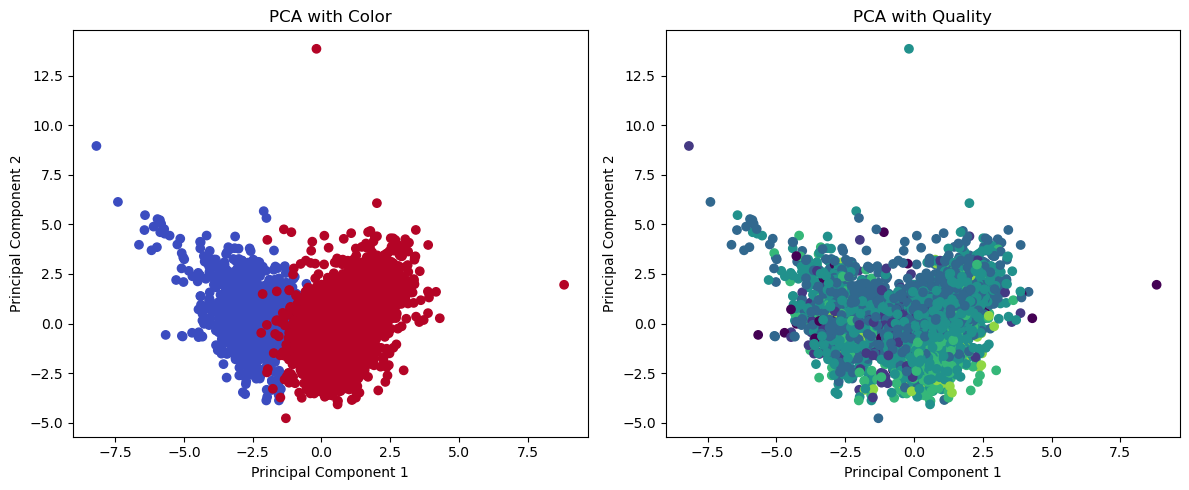

In [27]:
# Plot PCA with color-coded points
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine_scaled_df['color_white'], cmap='coolwarm')
plt.title('PCA with Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot PCA with quality-coded points
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine_scaled_df['quality'], cmap='viridis')
plt.title('PCA with Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">From the PCA plot, we observe the following:<br>
<strong>Color Differentiation:</strong> It seems there's a clear separation between red and white wines along the first principal component axis. This indicates that the PCA transformation is able to capture the differences between the chemical properties of red and white wines.<br>
<strong>Quality Differentiation:</strong> There's more overlap between the different quality scores, making it harder to distinguish wines based solely on quality in this PCA-transformed space.

<div class="alert alert-block alert-success">We now repeat the same visualization for tSNE.

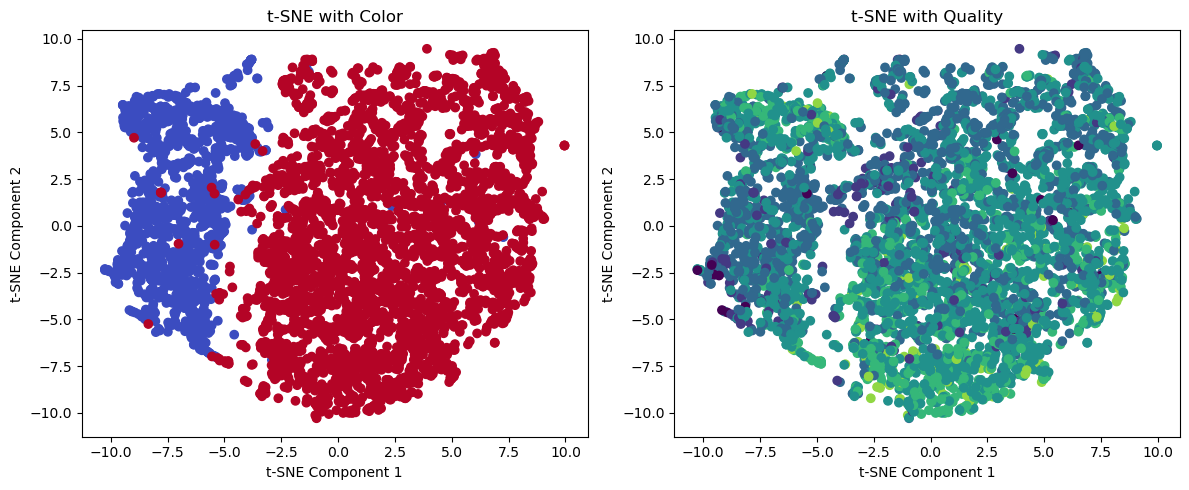

In [28]:
# Plot t-SNE with color-coded points
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=wine_scaled_df['color_white'], cmap='coolwarm')
plt.title('t-SNE with Color')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Plot t-SNE with quality-coded points
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=wine_scaled_df['quality'], cmap='viridis')
plt.title('t-SNE with Quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">From the tSNE plot, we observe:

<strong>Color Differentiation:</strong> The tSNE transformation seems to have done an excellent job in separating the red and white wines. The clusters are distinct and there's minimal overlap between the two groups, indicating a clear distinction in chemical properties between red and white wines.<br>
<strong>Quality Differentiation:</strong> Similar to the PCA plot, the tSNE plot also shows overlap among wines of different quality scores and does a poor job of distingushing wines based on quality.

<div class="alert alert-block alert-success">Given the observations so far, tSNE appears to provide a slightly better separation between red and white wines compared to PCA while both PCA and tSNE fail to separate wines based on quality.

<div class="alert alert-block alert-success">In the next step, we apply K-Means clustering to the two-dimensional PCA-transformed features, aiming to identify two clusters. We then visualize these clusters on a scatter plot using the two principal components as axes. The clusters are color-coded allowing us to discern how the K-Means algorithm has grouped the data points in the PCA-transformed space.

/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


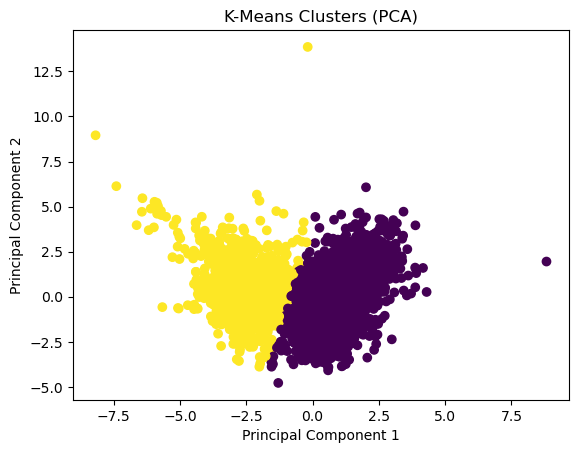

In [29]:
# Perform K-Means clustering on PCA reduced features
kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Visualize PCA-based clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA)')
plt.show()

<div class="alert alert-block alert-success">
Using K-Means clustering, we ended up with two clear groups. Given the previous observations in the unclustered plots, it is reasonable to infer that these clusters likely correspond to red and white wines.
To be absolutely certain, one would typically compare the cluster labels assigned by K-Means to the actual labels (red or white) of the wines. If there's a high match between the cluster labels and the actual wine colors, then we can confidently say that the clusters represent red and white wines. Without this direct comparison, we're making an educated guess based on the visualizations.<br><br>
However, when we look at these groups, they don't seem to be formed based on wine quality. Instead, each group has wines of various quality levels mixed together. So, the clustering isn't separating high-quality wines from low-quality wines.

<div class="alert alert-block alert-success">We now repeat the same exercise as above for tSNE features

/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


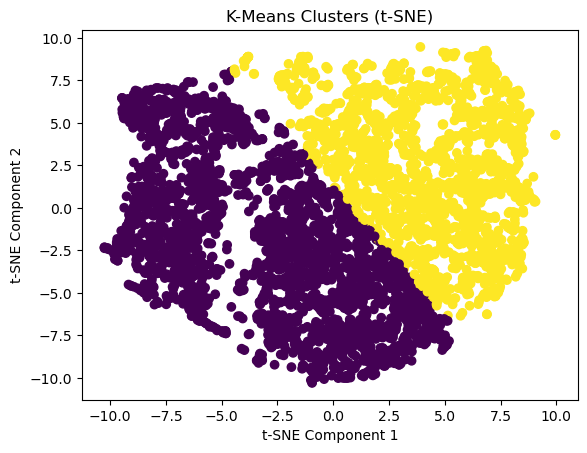

In [30]:
# Perform K-Means clustering on t-SNE features
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Visualize t-SNE-based clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clusters (t-SNE)')
plt.show()

<div class="alert alert-block alert-success">Using the K-Means algorithm on tSNE-transformed data, we identified certain neighborhoods or groups of similar wines. Given the patterns observed in the unclustered tSNE plots, it is unlikely that these neighborhoods represent the two types of wine - red and white. The purple cluster in the K-Means plot seems to cover a lot more points than the blue cluster in the tSNE plot.<br>
It's also evident that wine quality doesn't seem to be the primary factor bringing wines together. Within each group, we find wines spanning a range of quality scores. This suggests that the tSNE transformation, followed by K-Means, doesn't necessarily group wines based on their quality.

<div class="alert alert-block alert-success">
<strong>Conclusions:</strong><br>
<strong>Dimensionality Reduction Techniques:</strong> Both PCA and tSNE were effective in reducing the dimensionality of the wine data while preserving the distinction between red and white wines. tSNE provided a slightly clearer separation between the two wine types.<br>
<strong>Clustering:</strong> K-Means clustering on PCA features was able to create distinct clusters, likely corresponding to wine color. However, neither transformation with K-Means clustering effectively separated wines based on quality.<br>
<strong>Wine Color vs. Quality:</strong> While both PCA and tSNE could distinguish between red and white wines, neither technique was particularly effective at distinguishing wines based solely on quality. The overlap among wines of different quality scores in both visualizations suggests that the chemical properties alone may not be sufficient for this task.